In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Allgemeine Berechnung für die Biegelinie

Vereinfachungen und Randbedingungen:
- z beginnt immer im Festlager und geht bis zum Loslager
- Welleninformationen können über Klasse Welle abgerufen werden (Durchmesser, Kräfte, etc)
- Alle Längen in $mm$

In [101]:
class Welle:
    def __init__(self) -> None:
        self.geometrie = []
        self.z_daten = []
        self.r_daten = []
    def set_geometrie(self,punkte:list):
        """
        Definiert die Wellengeometrie als Liste aus Punkten in der Form [[z1,r1],[z2,r2],...]
        """
        self.geometrie = punkte
        self.z_daten,self.r_daten = zip(*self.geometrie)
    def radius(self,z):
        """Gibt Radius der Welle an Stelle z aus. Alle Längen werden in `mm` angegeben"""
        for i,zr in enumerate(self.geometrie):
            z1,z2 = self.geometrie[i-1][0],self.geometrie[i][0]
            r1,r2 = self.geometrie[i-1][1],self.geometrie[i][1]
            
            if z<=z2:
                m = (z - z1) / (z2 - z1)
                return r1 + m * (r2 - r1)
        else:
            return 0
    def d(self,z):
        return 2*self.radius(z)

    def plot(self):
        zrange = np.arange(0,max(self.z_daten),0.1)
        rrange = np.array(tuple(map(self.radius,zrange)))
        plt.plot(zrange,rrange,"k")
        plt.plot(zrange,rrange*-1,"k")
        plt.hlines(0,-5,self.z_daten[-1]+5,linestyles="dashdot",colors="black")
        for i,z in enumerate(self.z_daten):
            plt.vlines(z,self.radius(z)*-1,self.radius(z),colors="black")
        plt.grid()
        plt.xlabel("$z\\,[mm]$")
        plt.ylabel("$r\\,[mm]$")

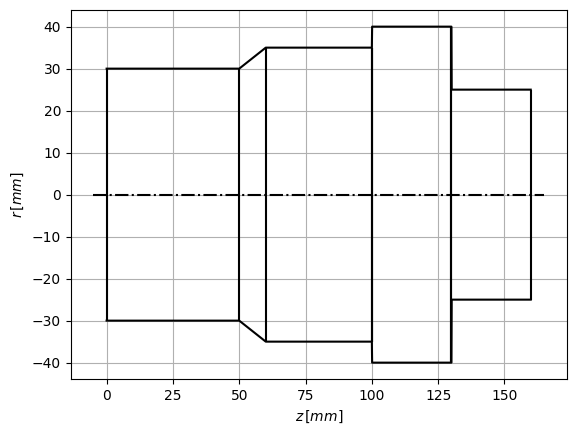

In [104]:
Zwischenwelle = Welle()
zw_geometrie = [
    [0,30],
    [50,30],
    [60,35],
    [100,35],
    [100,40],
    [130,40],
    [130,25],
    [160,25],
]

Zwischenwelle.set_geometrie(zw_geometrie)
Zwischenwelle.plot()